# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
df = pd.read_csv('/Users/seungwooseo/Desktop/Python/Kaggle/KNN algorithm dataset/KNNAlgorithmDataset.csv')

## Importing Database

In [29]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Standardizing the features

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()

## 'Diagnosis' Column is target / the others are Independent except 'id' column

In [31]:
sc.fit(df.drop(columns='diagnosis'))

StandardScaler()

In [32]:
df_scaled = sc.transform(df.drop(columns='diagnosis'))

In [33]:
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(columns='diagnosis').columns) #Make the table Pandas DataFrame

In [34]:
df_scaled.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [12]:
df_scaled = df_scaled.drop(columns='id') # Because id is just categories and no meaning.

# Import KNN Libraries 

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
X = df_scaled #Standardized Features
y = df['diagnosis'] #Not-standardized because these are target and categorical features.

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

## Figure out the minimum error_rate which means the highest accruacy

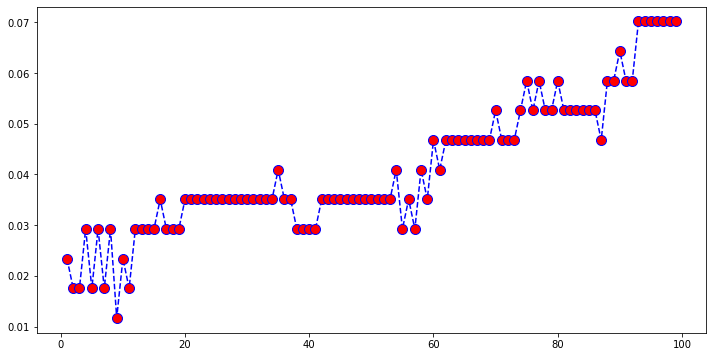

In [35]:
plt.figure(figsize=(12,6))
error_rate = []
for i in range(1,100):
    knc = KNeighborsClassifier(n_neighbors = i)
    knc.fit(x_train,y_train)
    pred_i = knc.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,100),error_rate,linestyle='dashed',marker='o',color='blue',markersize=10,markerfacecolor='red')
plt.show()

#Because the error_rates have been increased since the minimum value, it is assumed that it will keep increasing.

In [36]:
np.argmin(error_rate) #argmin is the function to find the index of minimum value.

8

In [37]:
knc = KNeighborsClassifier(n_neighbors=9) #Index was 8, and this means 'k' is 9.
knc.fit(x_train,y_train)
predictions = knc.predict(x_test)
print(accuracy_score(y_test,predictions))

0.9883040935672515


In [38]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[111   1]
 [  1  58]]
              precision    recall  f1-score   support

           B       0.99      0.99      0.99       112
           M       0.98      0.98      0.98        59

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

